In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
import seaborn as sns
from mol2vec.features import mol2alt_sentence, MolSentence, DfVec, sentences2vec
from mol2vec.helpers import depict_identifier, plot_2D_vectors, IdentifierTable, mol_to_svg

In [2]:
aa_smis = ['CC(N)C(=O)O', 'N=C(N)NCCCC(N)C(=O)O', 'NC(=O)CC(N)C(=O)O', 'NC(CC(=O)O)C(=O)O',
          'NC(CS)C(=O)O', 'NC(CCC(=O)O)C(=O)O', 'NC(=O)CCC(N)C(=O)O', 'NCC(=O)O',
          'NC(Cc1cnc[nH]1)C(=O)O', 'CCC(C)C(N)C(=O)O', 'CC(C)CC(N)C(=O)O', 'NCCCCC(N)C(=O)O',
          'CSCCC(N)C(=O)O', 'NC(Cc1ccccc1)C(=O)O', 'O=C(O)C1CCCN1', 'NC(CO)C(=O)O',
          'CC(O)C(N)C(=O)O', 'NC(Cc1c[nH]c2ccccc12)C(=O)O', 'NC(Cc1ccc(O)cc1)C(=O)O',
          'CC(C)C(N)C(=O)O']
aa_codes = ['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLU', 'GLN', 'GLY', 'HIS', 'ILE', 
            'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL']

In [3]:
aas = [Chem.MolFromSmiles(x) for x in aa_smis]

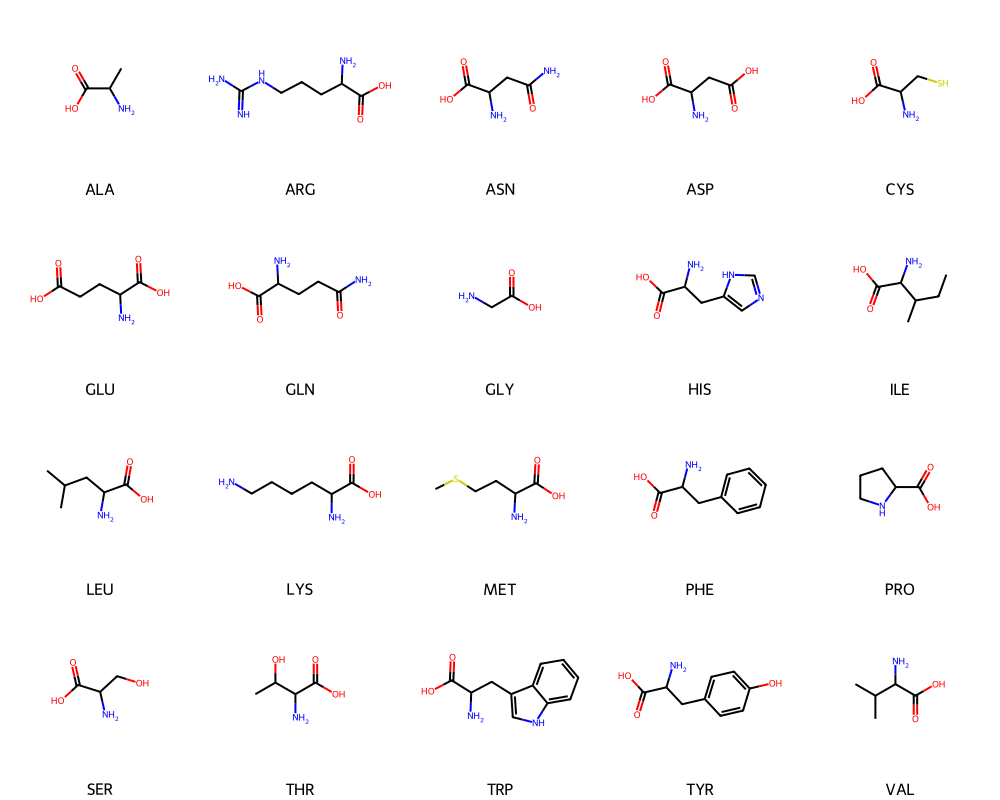

In [4]:
Draw.MolsToGridImage(aas, molsPerRow=5, useSVG=False, legends=aa_codes)

In [5]:
sentence = mol2alt_sentence(aas[0], 1)
sentence

['2246728737',
 '3537119515',
 '2245273601',
 '2655406212',
 '847957139',
 '2599973650',
 '2246699815',
 '3855312692',
 '864942730',
 '1510328189',
 '864662311',
 '1533864325']

[09:22:00] The new font size 0.8 is below the current minimum (6).


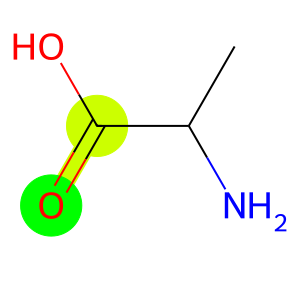

In [6]:
depict_identifier(aas[0], 1510328189, 1)

In [7]:
it = IdentifierTable(sentence, [aas[0]]*len(sentence), [sentence]*len(sentence), 5, 1)
it

[09:22:02] The new font size 0.8 is below the current minimum (6).
[09:22:02] The new font size 0.8 is below the current minimum (6).
[09:22:02] The new font size 0.8 is below the current minimum (6).
[09:22:02] The new font size 0.8 is below the current minimum (6).
[09:22:02] The new font size 0.8 is below the current minimum (6).
[09:22:02] The new font size 0.8 is below the current minimum (6).
[09:22:02] The new font size 0.8 is below the current minimum (6).
[09:22:02] The new font size 0.8 is below the current minimum (6).
[09:22:02] The new font size 0.8 is below the current minimum (6).
[09:22:02] The new font size 0.8 is below the current minimum (6).
[09:22:02] The new font size 0.8 is below the current minimum (6).
[09:22:02] The new font size 0.8 is below the current minimum (6).


In [8]:
from gensim.models import word2vec

In [9]:
model = word2vec.Word2Vec.load(r'D:\AI-Drug\Rate Prediction\mol2vec_document\mol2vec-master\examples\models\model_300dim.pkl')

In [11]:
len(model.wv.key_to_index)

21003

In [19]:
model.wv.word_vec('2246728737')

C:\Users\Zhouhaifan\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  """Entry point for launching an IPython kernel.


array([-0.13674529,  0.06729241, -0.05213054, -0.00750703,  0.28921816,
       -0.13024387, -0.18778022, -0.08180202,  0.17663261, -0.23623651,
        0.15215029,  0.03104335,  0.22715245, -0.00406356,  0.0321878 ,
       -0.14886402,  0.35155123,  0.05230371,  0.25634497,  0.14891872,
       -0.0038601 ,  0.16931136,  0.31372482,  0.01881147, -0.19952172,
        0.03404459, -0.04627627, -0.21893106,  0.12341108,  0.05439068,
        0.05448844, -0.04903906, -0.31361288, -0.33548406, -0.04213666,
       -0.14339392, -0.0289033 , -0.0923715 ,  0.18249372,  0.1544386 ,
       -0.09051799,  0.07533539, -0.01364344, -0.17796858, -0.06144299,
       -0.00402305, -0.10959177,  0.09328562, -0.08955006,  0.15117231,
        0.12398589, -0.20872705,  0.3017063 , -0.16636986, -0.26913744,
       -0.12916061, -0.15348934,  0.11056198, -0.02592117, -0.06371941,
       -0.19357003,  0.00200986, -0.05617516,  0.0011254 , -0.5563765 ,
        0.04836231, -0.00086217,  0.08364478, -0.30566263,  0.05

In [20]:
aa_sentences = [mol2alt_sentence(x, 1) for x in aas]
flat_list = [item for sublist in aa_sentences for item in sublist]
aa_identifiers_unique = set(flat_list)

In [21]:
df_vec = pd.DataFrame()
df_vec['identifier'] = list(aa_identifiers_unique)
df_vec.index = df_vec['identifier']

In [22]:
len(df_vec)

75

In [23]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [24]:
pca_model = PCA(n_components=30)
tsne_model = TSNE(n_components=2, perplexity=10, n_iter=1000, metric = 'cosine')
tsne_pca = tsne_model.fit_transform(pca_model.fit_transform([model.wv.word_vec(x) for x in aa_identifiers_unique]))

C:\Users\Zhouhaifan\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Zhouhaifan\.conda\envs\py37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\Zhouhaifan\.conda\envs\py37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\Zhouhaifan\.conda\envs\py37\lib\site-packages\sklearn\manifold\_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distan

In [25]:
df_vec['PCA-t-SNE-c1'] = tsne_pca.T[0]
df_vec['PCA-t-SNE-c2'] = tsne_pca.T[1]

In [26]:
df_vec.head(3)

,identifier,PCA-t-SNE-c1,PCA-t-SNE-c2
identifier,,,
3537119515,3537119515,132.677124,-17.519159
1533864325,1533864325,103.339264,120.884071
864662311,864662311,-61.591122,70.517403


In [27]:
projections = df_vec.to_dict()

In [28]:
def get_values(identifier, projections):
    return np.array((projections['PCA-t-SNE-c1'][str(identifier)],projections['PCA-t-SNE-c2'][str(identifier)]))

In [29]:
get_values(2246728737, projections)

array([183.19430542,   1.39570904])

In [30]:
aa_values = [get_values(x, projections) for x in aa_sentences[0]]

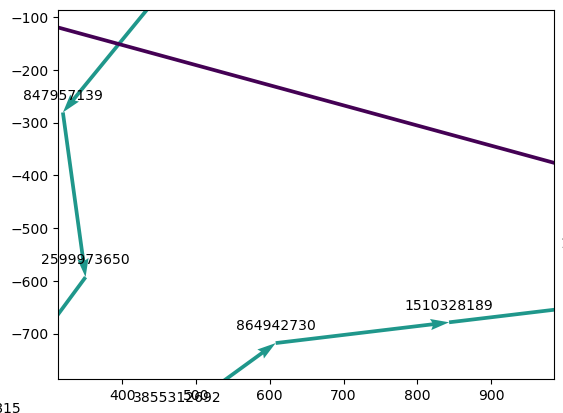

In [31]:
plot_2D_vectors(aa_values, vector_labels=aa_sentences[0] + ['ALA'], 
                );

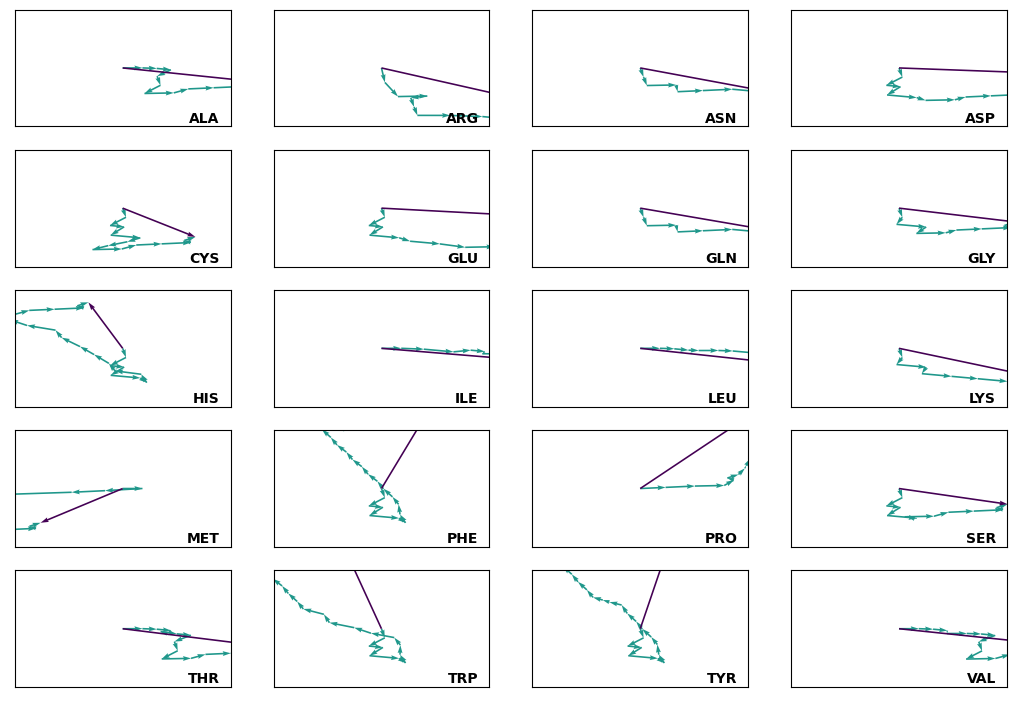

In [32]:
f, ((ALA, ARG, ASN, ASP), (CYS, GLU, GLN, GLY), (HIS, ILE, LEU, LYS), (MET, PHE, PRO, SER), (THR, TRP, TYR, VAL)) = plt.subplots(5,4, 
                                                    squeeze=True, sharex=True, sharey=True, 
                                                    figsize=(6.4*2,  4.4*2))

for aa,name,ax in zip(aas, aa_codes, (ALA, ARG, ASN, ASP, CYS, GLU, GLN, GLY, HIS, ILE, LEU, LYS, MET, PHE, PRO, SER, THR, TRP, TYR, VAL)):
    pca_subs = [get_values(x, projections) for x in mol2alt_sentence(aa, 1)]
    plot_2D_vectors(pca_subs, ax=ax, min_max_x=(-1000,1000), min_max_y=(-2000, 2000))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.text(0.95, 0.01, u"%s" % name,
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes, weight='bold',
            fontsize=10)